<a href="https://colab.research.google.com/github/BiniCodes/caffeine_coders_emotion_detection/blob/master/Training_Dataset_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning of the Training Dataset

In [0]:
!pip3 install http://download.pytorch.org/whl/cu80/torch-0.4.1-cp36-cp36m-linux_x86_64.whl 
 
  

     |████████████████████████████████| 483.0MB 1.1MB/s 
ERROR: torchvision 0.3.0 has requirement torch>=1.1.0, but you'll have torch 0.4.1 which is incompatible.
ERROR: fastai 1.0.57 has requirement torch>=1.0.0, but you'll have torch 0.4.1 which is incompatible.
  Found existing installation: torch 1.1.0
    Uninstalling torch-1.1.0:
      Successfully uninstalled torch-1.1.0


In [0]:
import torch
import torch.functional as F
import torch.nn as nn
import torch.optim as optim
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence


In [0]:
import re
import numpy as np
import time
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

import itertools
import pandas as pd
from scipy import stats
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
 #!ls "/content/gdrive/My Drive/"
  

!cp '/content/gdrive/My Drive/Colab Notebooks/Main Project Emotion Recognition/fear.txt'  'fear.txt'


In [0]:


!cp '/content/gdrive/My Drive/Colab Notebooks/Main Project Emotion Recognition/TrainingData/fear_TrainingData.csv' 'fearTra.csv'
!cp '/content/gdrive/My Drive/Colab Notebooks/Main Project Emotion Recognition/TrainingData/anger_TrainingData.csv' 'angerTra.csv'
!cp '/content/gdrive/My Drive/Colab Notebooks/Main Project Emotion Recognition/TrainingData/sadness_TrainingData.csv' 'sadnessTra.csv'
!cp '/content/gdrive/My Drive/Colab Notebooks/Main Project Emotion Recognition/TrainingData/joy_TrainingData.csv' 'joyTra.csv'



In [0]:
f = open('fearTra.csv', 'r')
fearTra = f.read()
print(fearTra)

﻿id,tweet,emotion,intensity
20000,I feel like I am drowning. #depression #anxiety #falure #worthless,fear,0.979
20001,I get so nervous even thinking about talking to ****** I wanna die,fear,0.979
20002,I lost my blinders .... #panic,fear,0.975
20003,I feel like I am drowning. #depression  #falure #worthless,fear,0.938
20004,This is the scariest American Horror Story out of all of them... I'm gonna have to watch in the daytime. #frightened,fear,0.938
20005,@mgcsartwork I nearly started crying and having a full on panic attack after tatinof bc of the crowds so I feel him,fear,0.938
20006,I have to finally tell my therapist about my sexuality ... last frontier ... not sure I can do it in the AM #fear #SingleGirlProblems,fear,0.938
20007,@laura221b I don't think I've ever moved so fast in a panic in all my life ðŸ˜‚ Gave me such a fright ðŸ˜“,fear,0.938
20008,My bus was in a car crash... I'm still shaking a bit... This week was an absolute horror and this was the icing on the cake... #terr

In [0]:
a = open('angerTra.csv', 'r')
angerTra = a.read()
print(angerTra)

﻿id,tweet,emotion,intensity
10000,How the fu*k! Who the heck! moved my fridge!... should I knock the landlord door. #angry #mad ##,anger,0.938
10001,So my Indian Uber driver just called someone the N word. If I wasn't in a moving vehicle I'd have jumped out #disgusted ,anger,0.896
10002,@DPD_UK I asked for my parcel to be delivered to a pick up store not my address #fuming #poorcustomerservice,anger,0.896
10003,so ef whichever butt wipe pulled the fire alarm in davis bc I was sound asleep #pissed #angry #upset #tired #sad #tired #hangry ######,anger,0.896
10004,"Don't join @BTCare they put the phone down on you, talk over you and are rude. Taking money out of my acc willynilly! #fuming",anger,0.896
10005,My blood is boiling,anger,0.875
10006,When you've still got a whole season of Wentworth to watch and a stupid cunt in work ruins it for us ðŸ˜­ðŸ˜­ @__KirstyGA #raging #oldcunt,anger,0.875
10007,"@bt_uk why does tracking show my equipment delivered, when it wasn't? Why is my service su

In [0]:
s = open('sadnessTra.csv', 'r')
sadnessTra = s.read()
print(sadnessTra)

﻿id,tweet,emotion,intensity
40000,Depression sucks! #depression,sadness,0.958
40001,Feeling worthless as always #depression,sadness,0.958
40002,Feeling worthless as always ,sadness,0.958
40003,My #Fibromyalgia has been really bad lately which is not good for my mental state. I feel very overwhelmed #anxiety #bipolar #depression,sadness,0.946
40004,Im think ima lay in bed all day and sulk. Life is hitting me to hard rn,sadness,0.934
40005,So when I try I fail... and when I don't try... I still fail... #confused and #lost,sadness,0.917
40006,Extreme sadness,sadness,0.917
40007,my life in one word is depressing,sadness,0.917
40008,Panic attacks are the worst. Feeling really sick and still shaking. I should be a sleep. #anxiety #depression,sadness,0.917
40009,Feel so grim + ugly atm,sadness,0.896
40010,Honestly depression is kicking my ass lately.. ðŸ˜”,sadness,0.896
40011,At my age all I see is gray. Is it gray because of my bad eyes or my perspective #depression  #healingjustice,sadness,

In [0]:
j = open('joyTra.csv', 'r')
joyTra = j.read()
print(joyTra)

﻿id,tweet,emotion,intensity
30000,Just got back from seeing @GaryDelaney in Burslem. AMAZING!! Face still hurts from laughing so much #hilarious,joy,0.98
30001,Oh dear an evening of absolute hilarity I don't think I have laughed so much in a long time! ðŸ˜‚,joy,0.958
30002,Been waiting all week for this game â¤ï¸â¤ï¸â¤ï¸ #cheer #friday â¤ï¸,joy,0.94
30003,"@gardiner_love : Thank you so much, Gloria! You're so sweet, and thoughtful! You just made my day more joyful! I love you too! ðŸ˜ŠðŸ’•",joy,0.938
30004,"I feel so blessed to work with the family that I nanny for â¤ï¸ nothing but love &amp; appreciation, makes me smile.",joy,0.938
30005,"Today I reached 1000 subscribers on YT!! , #goodday, #thankful",joy,0.926
30006,"@Singaholic121 Good morning, love! Happy first day of fall. Let's make some awesome #autumnmemories #annabailey #laughter #smile",joy,0.924
30007,"#BridgetJonesBaby is the best thing I've seen in ages! So funny, I've missed Bridget! #love  #TeamMark",joy,0.922


In [0]:
import os
import glob
import pandas as pd

os.chdir("/content/gdrive/My Drive/Colab Notebooks/Main Project Emotion Recognition/TrainingData")

In [0]:
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [0]:
#combine all training data files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "TrainingData3.csv", index=False, encoding='utf-8-sig')

In [0]:
tda = open('TrainingData3.csv', 'r')
trainingD = tda.read()
print(trainingD)


﻿id,tweet,emotion,intensity
10000,How the fu*k! Who the heck! moved my fridge!... should I knock the landlord door. #angry #mad ##,anger,0.938
10001,So my Indian Uber driver just called someone the N word. If I wasn't in a moving vehicle I'd have jumped out #disgusted ,anger,0.8959999999999999
10002,@DPD_UK I asked for my parcel to be delivered to a pick up store not my address #fuming #poorcustomerservice,anger,0.8959999999999999
10003,so ef whichever butt wipe pulled the fire alarm in davis bc I was sound asleep #pissed #angry #upset #tired #sad #tired #hangry ######,anger,0.8959999999999999
10004,"Don't join @BTCare they put the phone down on you, talk over you and are rude. Taking money out of my acc willynilly! #fuming",anger,0.8959999999999999
10005,My blood is boiling,anger,0.875
10006,When you've still got a whole season of Wentworth to watch and a stupid cunt in work ruins it for us ðŸ˜­ðŸ˜­ @__KirstyGA #raging #oldcunt,anger,0.875
10007,"@bt_uk why does tracking show my equip

AttributeError: ignored

In [0]:
trainingD = pd.read_csv('TrainingData3.csv')
trainingD.shape

(7226, 4)

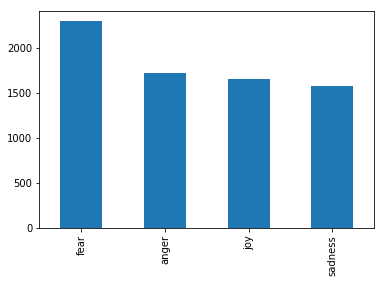

In [0]:
training.emotion.value_counts().plot.bar()

In [0]:
training.to_pickle("./trainingData2.pkl")

In [0]:
data = pd.read_pickle("./trainingData2.pkl")
data.head(10)


In [0]:
data.emotion.value_counts().plot.bar()

In [0]:
data.shape

In [0]:
### Helper functions
import pickle

def convert_to_pickle(item, directory):
    pickle.dump(item, open(directory,"wb"))


def load_from_pickle(directory):
    return pickle.load(open(directory,"rb"))

In [0]:
trainingData = load_from_pickle("/content/gdrive/My Drive/Colab Notebooks/Main Project Emotion Recognition/TrainingData/trainingData2.pkl")

In [0]:
# retain only text that contain less that 70 tokens to avoid too much padding
#trainingData["token_size"] = trainingData["tweet"].apply(lambda x: len(x.split(' ')))
#trainingData = trainingData.loc[trainingData['token_size'] < 70].copy()

# sampling
#trainingData = trainingData.sample(n=10839);

In [0]:


#trainingData["token_size"]

print(type(trainingData))



In [0]:
trainingData


In [0]:
trainingData['tweet'][8]

In [0]:
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
import re

#Clean the @mention from tweets
pat1 = r'@[A-Za-z0-9]+'

#Clean links from tweets
pat2 = r'https?://[A-Za-z0-9./]+'

combined_pat = r'|'.join((pat1, pat2))

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()

testing = trainingData.tweet

test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))
test_result

In [0]:
trainingData["newTweets"] = test_result

In [0]:
trainingData

In [0]:
trainingData.drop(columns=['tweet'])

trainingData

In [0]:
trainingData = trainingData[['id','newTweets','emotion','intensity']]

In [0]:
trainingData

In [0]:
trainingData = trainingData.rename(columns={"newTweets": "tweets"})

In [0]:
trainingData

In [0]:
#nums = [0,14032,18065]
#print ("Cleaning and parsing the tweets...\n")
#clean_tweet_texts = []
#for i in xrange(nums[0],nums[1]):
 #   if( (i+1)%10000 == 0 ):
  #      print ("Tweets %d of %d has been processed" % ( i+1, nums[1] ))                                                                    
   # clean_tweet_texts.append(tweet_cleaner(trainingData['tweet'][i]))

In [0]:
trainingData.head(10)


In [0]:
trainingData.to_csv(r'"/content/gdrive/My Drive/Colab Notebooks/Main Project Emotion Recognition/TrainingData/cleanedtrainingData2.csv')

NameError: ignored

In [0]:
trainingData.to_pickle("./cleanTrainingData2.pkl")

In [0]:
cleanTrainingData = load_from_pickle("/content/gdrive/My Drive/Colab Notebooks/Main Project Emotion Recognition/TrainingData/cleanTrainingData2.pkl")

cleanTrainingData

,id,tweets,emotion,intensity
0,10000,how the fu k who the heck moved my fridge shou...,anger,0.938
1,10001,so my indian uber driver just called someone t...,anger,0.896
2,10002,uk i asked for my parcel to be delivered to a ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,don t join they put the phone down on you talk...,anger,0.896
5,10005,my blood is boiling,anger,0.875
6,10006,when you ve still got a whole season of wentwo...,anger,0.875
7,10007,uk why does tracking show my equipment deliver...,anger,0.875
8,10008,legit why i am so furious with him people are ...,anger,0.875
9,10009,how is it suppose to work if you do that wtf d...,anger,0.875
